In [1]:
import librosa
from librosa import feature
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import pandas as pd

In [2]:
#load example audio file
ex_audio = 'audio/Music_dazSQipxqMc.wav'
sr = 22050 #define default sampling rate
y, sample_rate = librosa.load(ex_audio, sr=sr) 

### Chroma Features: calculate mean chroma values for each chroma feature across all time frames

In [3]:
#np.mean(chroma_stft, axis=1): This line calculates the mean of the chroma_stft matrix along the specified axis, 
#which is axis 1. This means it computes the mean for each row (i.e., for each chroma feature) in the chroma_stft matrix. 
#The resulting array will contain the mean chroma values for each chroma feature across all the time frames. 
#In other words, it calculates the average energy of each musical pitch class (chroma) in the entire audio signal.
# The chroma_stft representation is a way to analyze the pitch content of an audio signal. 
#It divides the audio signal into short time frames and calculates the energy of different musical pitch classes (chroma) within each frame. 
#As a result, you get a matrix where each row represents a chroma feature, and each column represents a time frame


chroma_stft = feature.chroma_stft(y=y, sr=sr)
np.mean(chroma_stft, axis=1)

array([0.42781758, 0.54765093, 0.808867  , 0.5893175 , 0.40198243,
       0.4740542 , 0.4933888 , 0.5649214 , 0.57759625, 0.58134484,
       0.7511935 , 0.52217597], dtype=float32)

In [4]:
#global summary of the pictch content
np.mean(chroma_stft)

0.5616926

In [5]:
np.mean(np.mean(chroma_stft, axis=1))

0.56169254

In [6]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
np.mean(chroma_cens, axis=1)

array([0.04484062, 0.11836286, 0.35729092, 0.12481465, 0.08847029,
       0.14791584, 0.35962594, 0.669502  , 0.36792225, 0.16154802,
       0.16520631, 0.08180761], dtype=float32)

In [7]:
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
np.mean(chroma_cqt, axis=1)

array([0.1613325 , 0.20281179, 0.38777578, 0.21943827, 0.18775353,
       0.21913292, 0.40004477, 0.99875367, 0.45462152, 0.24634229,
       0.24740684, 0.19065087], dtype=float32)

### Spectral Features: 

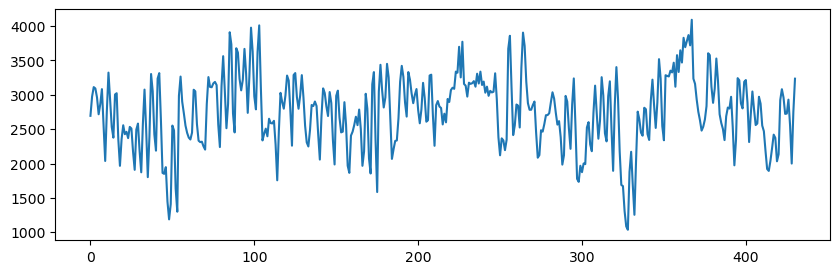

In [8]:
spectral_centroids = feature.spectral_centroid(y=y, sr=sr)[0]
plt.figure(figsize=(10,3))
plt.plot(spectral_centroids)

In [9]:
np.mean(spectral_centroids)

2746.2136422405583

In [10]:
spectral_bandwidth = feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
np.mean(spectral_bandwidth)

2525.18928056716

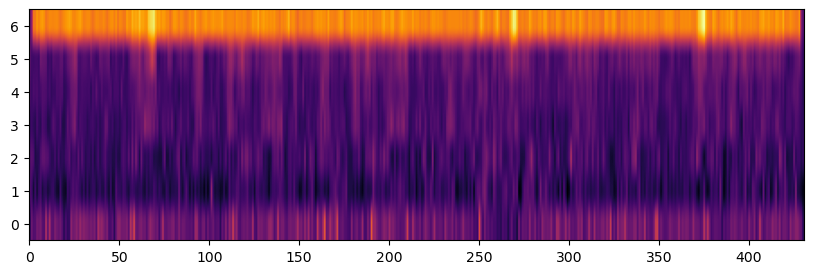

In [11]:
#Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast is estimated by
#comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). 
#High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise
spectral_contrast = feature.spectral_contrast(y=y, sr=sr, n_bands=6)

plt.figure(figsize=(10,3))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='inferno')

In [12]:
np.mean(spectral_contrast, axis=1)

array([21.74767253, 12.70043138, 15.06011946, 16.71355249, 17.32824829,
       20.09574997, 48.47173665])

In [13]:
spectral_rolloff = feature.spectral_rolloff(y=y, sr=sr)
spectral_rolloff[0]

array([6750.65917969, 7159.79003906, 6481.49414062, 6018.53027344,
       5620.16601562, 5146.43554688, 5964.69726562, 6772.19238281,
       5254.1015625 , 4188.20800781, 6427.66113281, 7062.890625  ,
       6470.72753906, 5307.93457031, 5146.43554688, 7159.79003906,
       7267.45605469, 5232.56835938, 4188.20800781, 4866.50390625,
       4920.33691406, 4586.57226562, 4575.80566406, 4618.87207031,
       4780.37109375, 4748.07128906, 4209.74121094, 4209.74121094,
       6180.02929688, 6126.19628906, 4468.13964844, 4112.84179688,
       6578.39355469, 7450.48828125, 6610.69335938, 4112.84179688,
       6136.96289062, 7278.22265625, 6642.99316406, 4661.93847656,
       4403.54003906, 7159.79003906, 7245.92285156, 5620.16601562,
       3994.40917969, 4726.53808594, 5975.46386719, 3617.578125  ,
       2874.68261719, 3423.77929688, 7256.68945312, 7127.49023438,
       3757.54394531, 3079.24804688, 6007.76367188, 5964.69726562,
       4995.703125  , 4705.00488281, 4543.50585938, 4306.64062

### Zero Crossing Rate

In [14]:
#zero crossing rate. add constant to y to control for any silence or intro at beginning of clip
zcr = feature.zero_crossing_rate(y + 0.0001)[0]
np.mean(zcr)

0.11006607091067286

### Mel Frequency Cepstral Coefficients

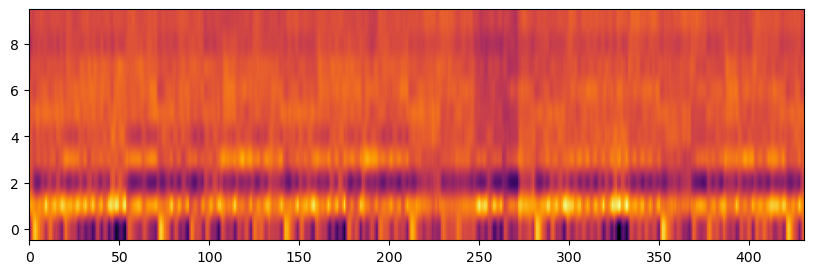

In [15]:
#mel-frequency cepstral coefficients
mfcc = feature.mfcc(y=y, sr=sr, n_mfcc=10)
plt.figure(figsize=(10,3))
plt.imshow(mfcc, aspect='auto', origin='lower', cmap='inferno')

In [16]:
np.mean(mfcc, axis=1)

array([ -6.6242557,  56.430466 , -29.335646 ,  30.60507  ,  15.296817 ,
        23.46738  ,  23.938986 ,  18.10369  ,   7.3114734,  14.014429 ],
      dtype=float32)

### Root Mean Squared

In [17]:
rms = librosa.feature.rms(y= y+0.0001)
np.mean(rms)

0.3115231

### Rythm Features

In [18]:
beat_track_tempo = librosa.beat.beat_track(y=y, sr=sr)[0]
beat_track_tempo

151.99908088235293

In [19]:
feature_tempo = np.mean(feature.tempo(y=y, sr=sr))
feature_tempo

143.5546875

### Signal Features

In [20]:
signal_mean = np.mean(abs(y))
signal_stdev = np.std(y)
signal_skewness = scipy.stats.skew(abs(y))
signal_kurtosis = scipy.stats.kurtosis(y)

### Feature Dataframe

In [21]:
def extract_features(audio_file):
    # Load the audio file using librosa
    sr = 22050
    y, sr = librosa.load(audio_file, sr=sr)

    # Extract chroma features for different equations
    chroma_stft = feature.chroma_stft(y=y, sr=sr)
    chroma_cens = feature.chroma_cens(y=y, sr=sr)
    chroma_cqt = feature.chroma_cqt(y=y, sr=sr)
    spectral_centroids = feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
    spectral_contrast = feature.spectral_contrast(y=y, sr=sr, n_bands=6)
    spectral_rolloff = feature.spectral_rolloff(y=y, sr=sr)[0]
    zcr = feature.zero_crossing_rate(y + 0.0001)[0]
    mfcc = feature.mfcc(y=y, sr=sr, n_mfcc=10)
    beat_track_tempo = librosa.beat.beat_track(y=y, sr=sr)[0]
    feature_tempo = np.mean(feature.tempo(y=y, sr=sr))
    rms = librosa.feature.rms(y= y+0.0001)
    

    # Calculate means for each chroma feature for each equation
    mean_chroma_stft = np.mean(chroma_stft, axis=1)
    global_mean_chroma_stft = np.mean(chroma_stft)
    mean_chroma_cens = np.mean(chroma_cens, axis=1)
    global_mean_cens = np.mean(chroma_cens)
    mean_chroma_cqt = np.mean(chroma_cqt, axis=1)
    global_mean_cqt = np.mean(chroma_cqt)
    mean_spectral_centroid = np.mean(spectral_centroids)
    mean_spectral_bandwidth = np.mean(spectral_bandwidth)
    mean_spectral_contrast = np.mean(spectral_contrast, axis=1)
    global_mean_spectral_contrast = np.mean(spectral_contrast)
    mean_spectral_rolloff = np.mean(spectral_rolloff)
    zero_crossing_rate = np.mean(zcr)
    global_mean_mfcc = np.mean(mfcc)
    mean_mfcc = np.mean(mfcc, axis=1)
    beat_track_tempo = beat_track_tempo
    feature_tempo = feature_tempo
    mean_rms = np.mean(rms)

    #Calulate means for signal feaures
    signal_mean = np.mean(abs(y))
    signal_stdev = np.std(y)
    signal_skewness = scipy.stats.skew(abs(y))
    signal_kurtosis = scipy.stats.kurtosis(y)
    
    

    # Create a dictionary to store the features
    features = {
        'file_name': os.path.basename(audio_file),
        # Chroma stft
        'global_mean_chroma_stft': global_mean_chroma_stft,
        'chroma_stft_1': mean_chroma_stft[0],
        'chroma_stft_2': mean_chroma_stft[1],
        'chroma_stft_3': mean_chroma_stft[2],
        'chroma_stft_4': mean_chroma_stft[3],
        'chroma_stft_5': mean_chroma_stft[4],
        'chroma_stft_6': mean_chroma_stft[5],
        'chroma_stft_7': mean_chroma_stft[6],
        'chroma_stft_8': mean_chroma_stft[7],
        'chroma_stft_9': mean_chroma_stft[8],
        'chroma_stft_10': mean_chroma_stft[9],
        'chroma_stft_11': mean_chroma_stft[10],
        'chroma_stft_12': mean_chroma_stft[11],
        # Chroma cens
        'global_mean_cens': global_mean_cens,
        'chroma_cens_1': mean_chroma_cens[0],
        'chroma_cens_2': mean_chroma_cens[1],
        'chroma_cens_3': mean_chroma_cens[2],
        'chroma_cens_4': mean_chroma_cens[3],
        'chroma_cens_5': mean_chroma_cens[4],
        'chroma_cens_6': mean_chroma_cens[5],
        'chroma_cens_7': mean_chroma_cens[6],
        'chroma_cens_8': mean_chroma_cens[7],
        'chroma_cens_9': mean_chroma_cens[8],
        'chroma_cens_10': mean_chroma_cens[9],
        'chroma_cens_11': mean_chroma_cens[10],
        'chroma_cens_12': mean_chroma_cens[11],
        # Chroma cqt
        'global_mean_cqt': global_mean_cqt,
        'chroma_cqt_1': mean_chroma_cqt[0],
        'chroma_cqt_2': mean_chroma_cqt[1],
        'chroma_cqt_3': mean_chroma_cqt[2],
        'chroma_cqt_4': mean_chroma_cqt[3],
        'chroma_cqt_5': mean_chroma_cqt[4],
        'chroma_cqt_6': mean_chroma_cqt[5],
        'chroma_cqt_7': mean_chroma_cqt[6],
        'chroma_cqt_8': mean_chroma_cqt[7],
        'chroma_cqt_9': mean_chroma_cqt[8],
        'chroma_cqt_10': mean_chroma_cqt[9],
        'chroma_cqt_11': mean_chroma_cqt[10],
        'chroma_cqt_12': mean_chroma_cqt[11],
        # Spectral Centroid
        'spectral_centroid': mean_spectral_centroid,
        # spectral bandwidt
        'spectral_bandwidth': mean_spectral_bandwidth,
        #spectral contrast
        'global_mean_spectral_contrast': global_mean_spectral_contrast,
        'spectral_contrast_1': mean_spectral_contrast[0],
        'spectral_contrast_2': mean_spectral_contrast[1],
        'spectral_contrast_3': mean_spectral_contrast[2],
        'spectral_contrast_4': mean_spectral_contrast[3],
        'spectral_contrast_5': mean_spectral_contrast[4],
        'spectral_contrast_6': mean_spectral_contrast[5],
        'spectral_contrast_7': mean_spectral_contrast[6],
        #spectral rolloff
        'spectral_rolloff': mean_spectral_rolloff,
        #zero crossing rate
        'zero_crossing_rate': zero_crossing_rate,
        #mel frequency cepstral coefficients
        'global_mean_mfcc': global_mean_mfcc,
        'mfcc_1': mean_mfcc[0],
        'mfcc_2': mean_mfcc[1],
        'mfcc_3': mean_mfcc[2],
        'mfcc_4': mean_mfcc[3],
        'mfcc_5': mean_mfcc[4],
        'mfcc_6': mean_mfcc[5],
        'mfcc_7': mean_mfcc[6],
        'mfcc_8': mean_mfcc[7],
        'mfcc_9': mean_mfcc[8],
        'mfcc_10': mean_mfcc[9],
        #tempo
        'beat_track_tempo': beat_track_tempo,
        'feature_tempo': feature_tempo,
        #rms
        'mean_rms': mean_rms,
        #time features
        'signal mean': signal_mean,
        'signal stdev': signal_stdev,
        'signal skewness': signal_skewness,
        'signal kurtosis': signal_kurtosis

    }

    return features


In [22]:
audio_directory = 'audio/'
features_list = []

for file in tqdm(os.listdir(audio_directory)):
    if file.endswith('.wav'):
        audio_file = os.path.join(audio_directory, file)
        features = extract_features(audio_file) 
        features['file_name'] = file
        features_list.append(features)




 30%|████████████                            | 938/3105 [03:38<08:29,  4.25it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=688
  warnings.warn(
 33%|████████████▉                          | 1027/3105 [03:59<08:09,  4.25it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=877
  warnings.warn(
 42%|████████████████▎                      | 1298/3105 [05:02<07:04,  4.26it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=821
  warnings.warn(
 60%|███████████████████████▍               | 1866/3105 [07:14<04:52,  4.24it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to e

In [23]:
features_df = pd.DataFrame(features_list)
features_df.head()

,file_name,global_mean_chroma_stft,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,...,mfcc_8,mfcc_9,mfcc_10,beat_track_tempo,feature_tempo,mean_rms,signal mean,signal stdev,signal skewness,signal kurtosis
0,Animal_MslenAGSsHo.wav,0.570271,0.581818,0.646618,0.706214,0.690292,0.635286,0.594778,0.521217,0.473431,...,1.489605,-18.214935,1.971242,135.999178,135.999178,0.022001,0.013036,0.026504,8.888500,105.570977
1,Animal_8QSJw4MEMo0.wav,0.367457,0.297988,0.262824,0.354224,0.363104,0.451306,0.337480,0.361378,0.399233,...,-18.555685,-33.325890,15.849258,172.265625,129.199219,0.066833,0.052632,0.077297,2.368649,4.665862
2,Vehicle_1rfS8uKqj4o.wav,0.488967,0.639262,0.614823,0.550539,0.471572,0.402641,0.442104,0.569618,0.425721,...,9.872471,-2.715639,11.963491,123.046875,129.199219,0.078130,0.063891,0.087431,0.928588,0.357901
3,Music_vWHSAicYrXs.wav,0.476637,0.587124,0.491797,0.487837,0.489465,0.413237,0.461874,0.413858,0.383470,...,19.983311,-1.135275,6.325337,161.499023,151.999081,0.130622,0.105235,0.133500,1.143295,0.276828
4,Speech_NAA575lzITk.wav,0.406786,0.400832,0.367696,0.380573,0.389452,0.362394,0.389288,0.410195,0.437171,...,-7.062017,-16.129002,-2.049819,123.046875,129.199219,0.092621,0.066790,0.144623,3.129942,10.512643


In [24]:
file_name = 'features/sound_features.csv'
features_df.to_csv(file_name, index=False)